In [1]:
import sys
# To import python scripts from other folders
sys.path.append('../')
import matplotlib.pyplot as plt
import json
from ProjectTestAnalysis import ProjectTestAnalysis
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import re
import csv
root="/home/jovyan/work"
results_path=root+"/results/"
procesed_results_path=root+"/notebooks/ProjectAnalysis/TestAnalysis/results/"

In [2]:
def getProjects(dataset):
    path = root+"/configFiles/%sProjects/"%dataset
    projects = []
    for configFile in os.listdir(path):
        with open(path+configFile) as f:
            project_info = json.load(f)
            if os.path.isdir(procesed_results_path+project_info["project"]):
                projects.append((dataset, project_info["project"]))
    return projects

In [3]:
# Get Projects names
many4j = getProjects("ManySStub4J")
all_datasets = many4j

In [4]:
len(all_datasets)

97

In [5]:
ignored_android_projects = [
     'ActionBarSherlock',
     'roboguice',
     'android-Ultra-Pull-To-Refresh',
     'ViewPagerIndicator',
     'SlidingMenu',
     'NineOldAndroids',
     'ListViewAnimations',
     'Android-PullToRefresh',
     'ActiveAndroid',
     'android-common',
     'drag-sort-listview',
]

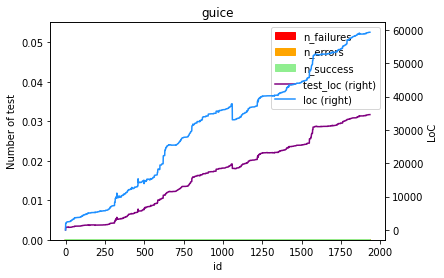

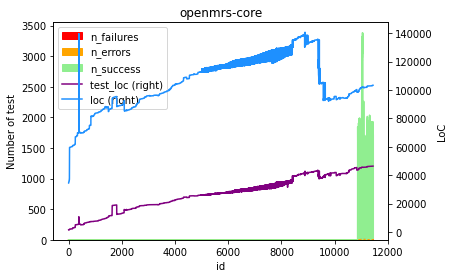

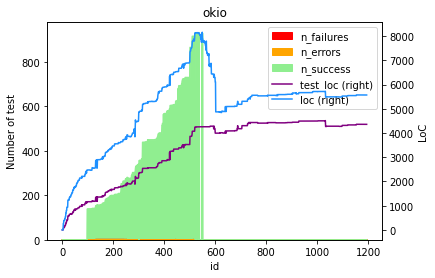

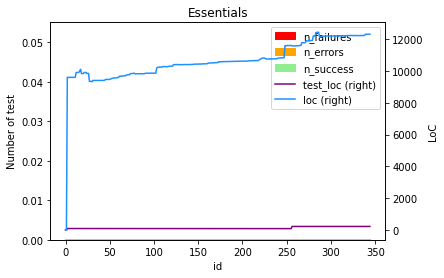

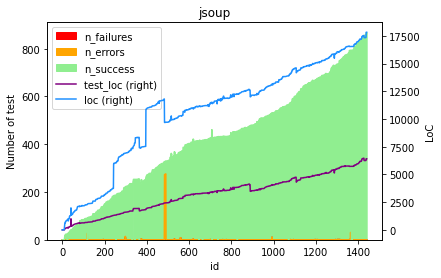

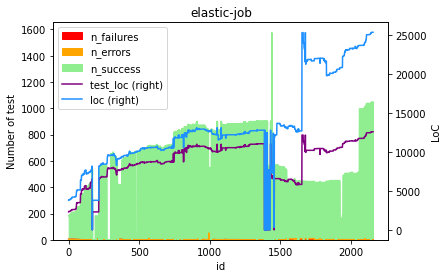

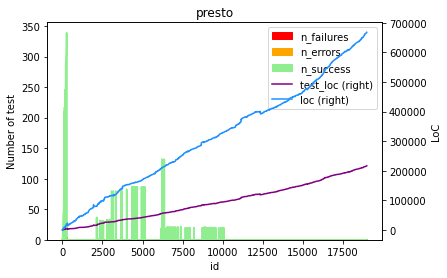

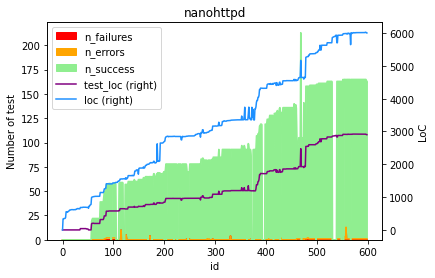

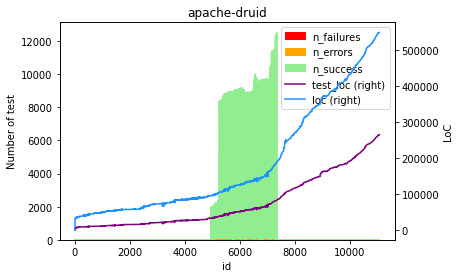

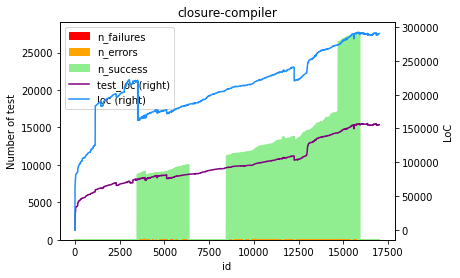

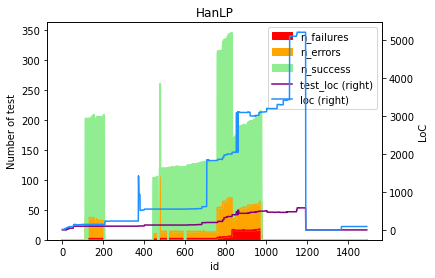

single positional indexer is out-of-bounds


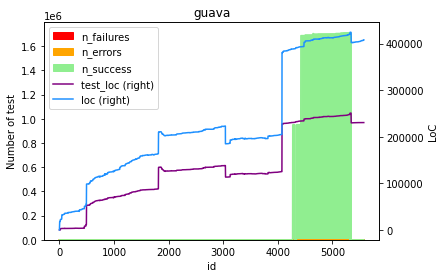

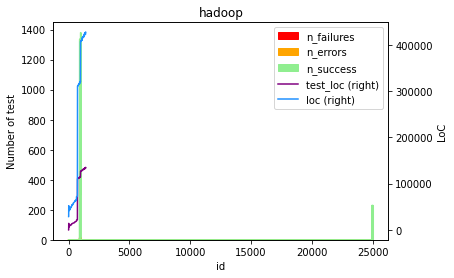

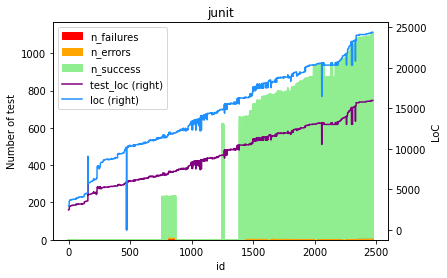

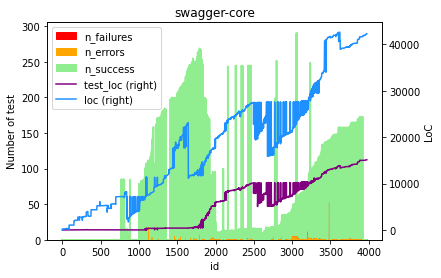

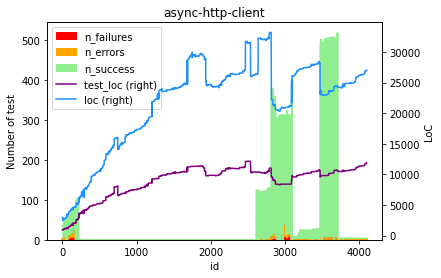

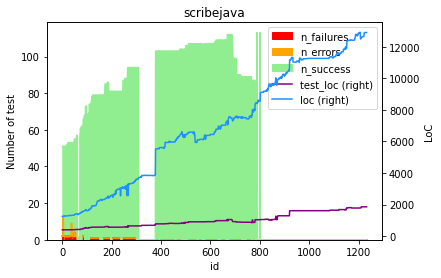

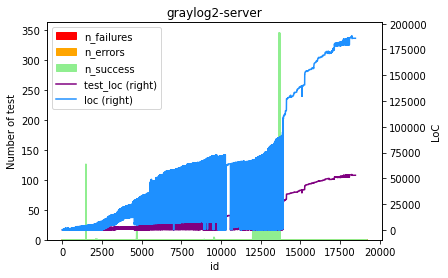

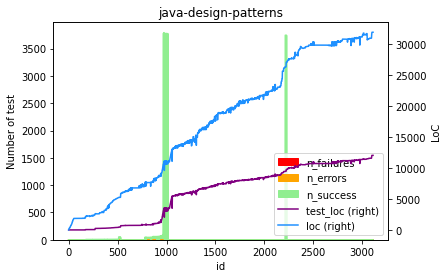

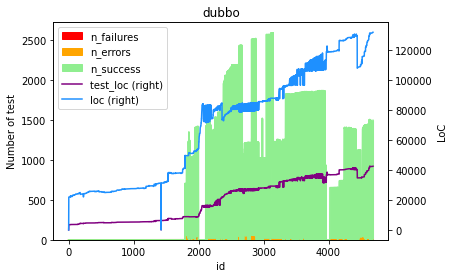

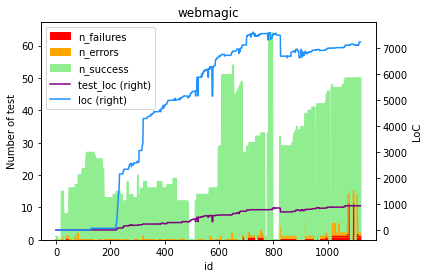

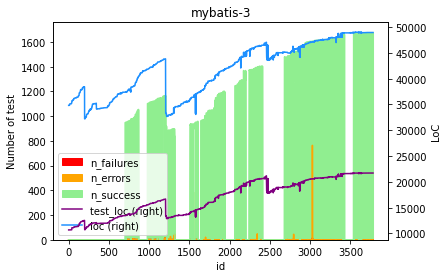

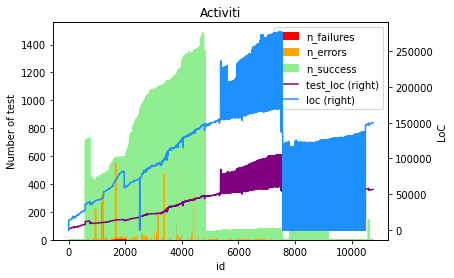

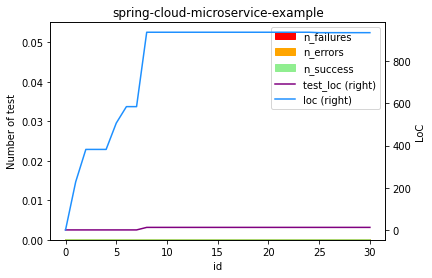

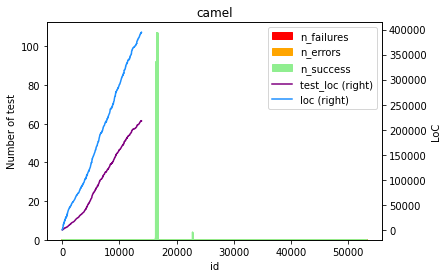

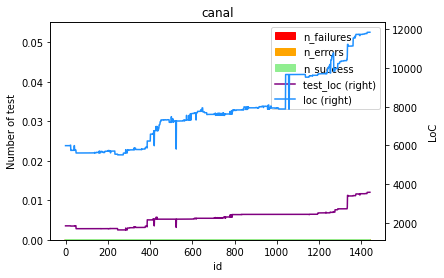

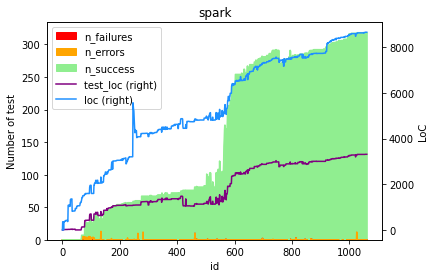

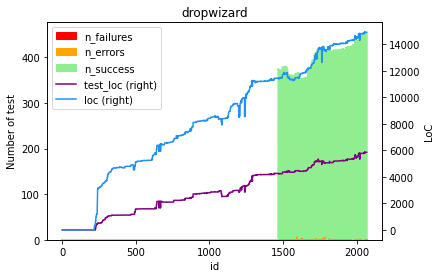

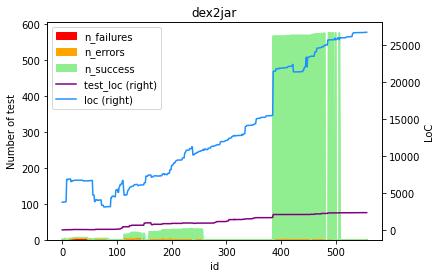

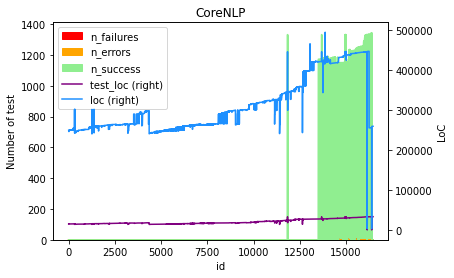

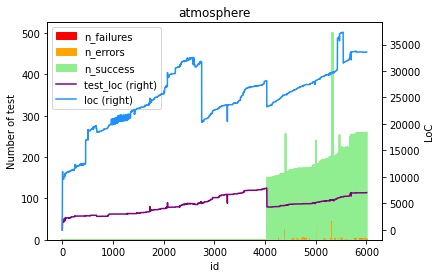

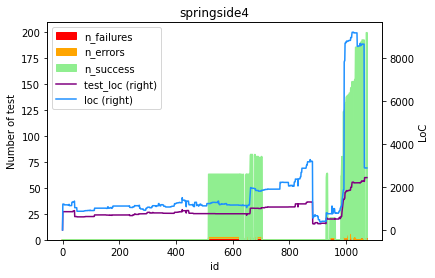

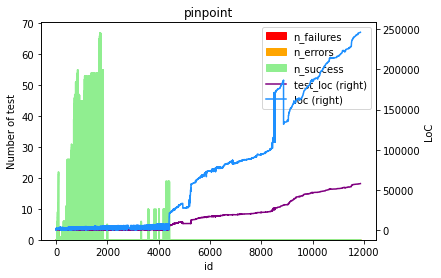

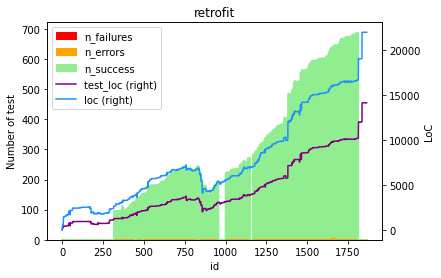

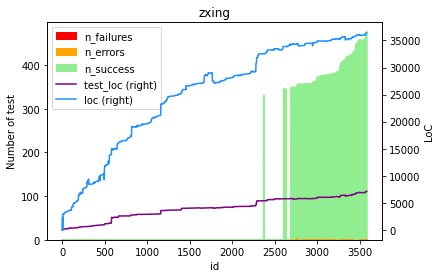

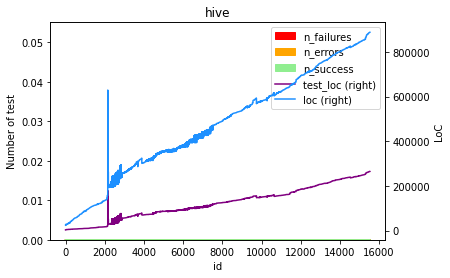

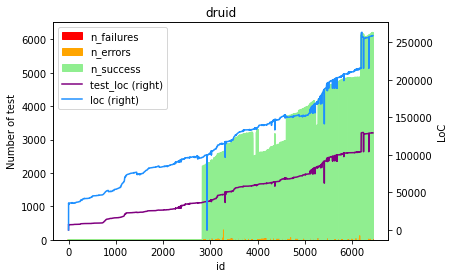

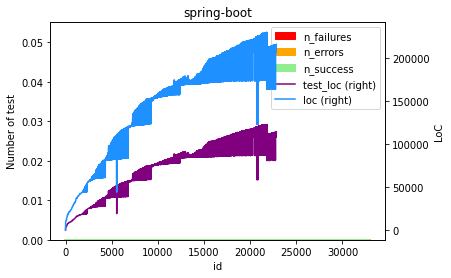

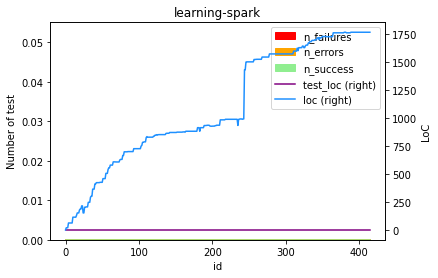

Project learning-spark has no test


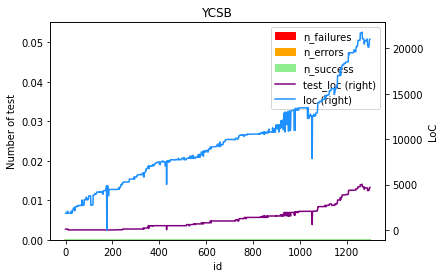

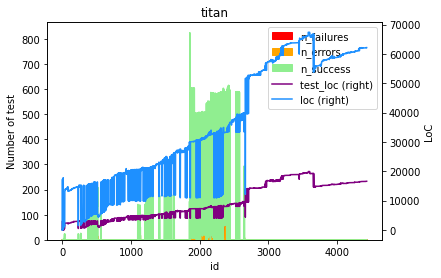

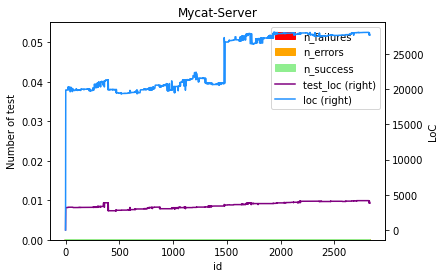

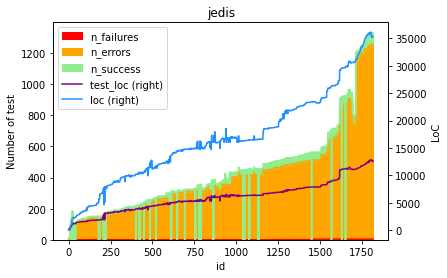

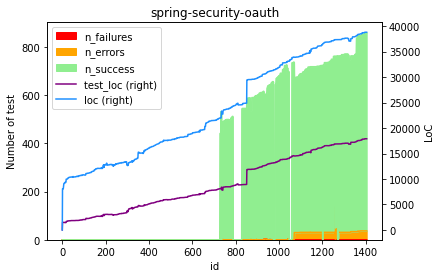

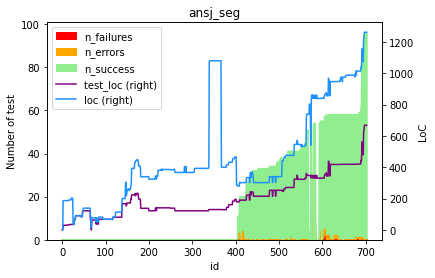

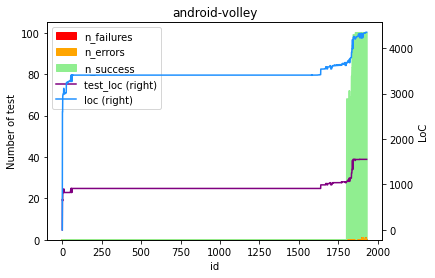

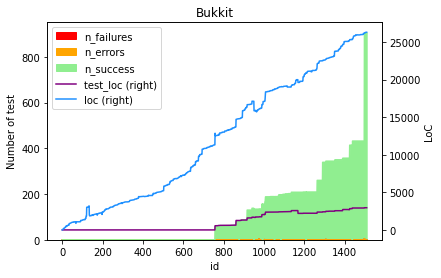

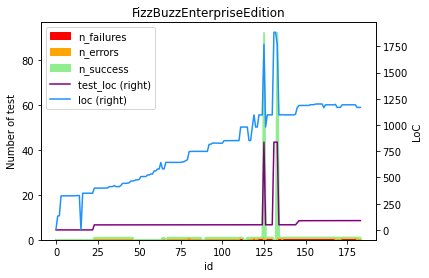

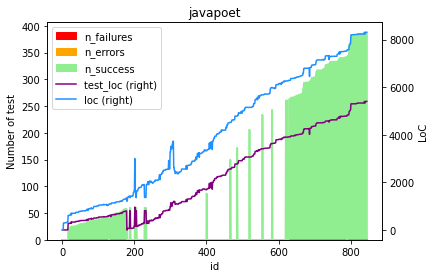

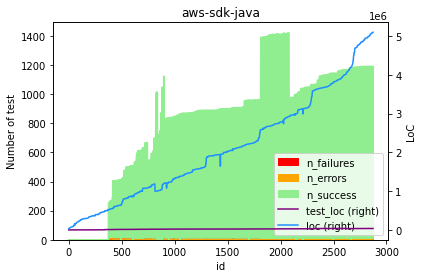

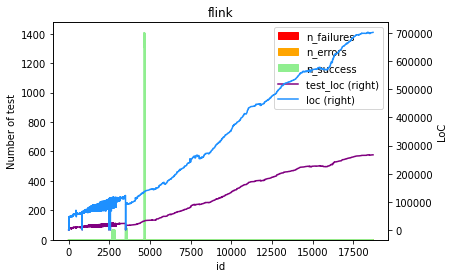

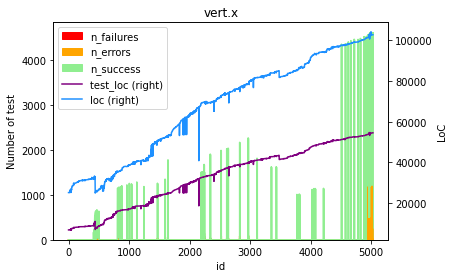

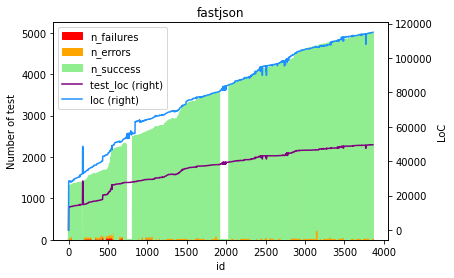

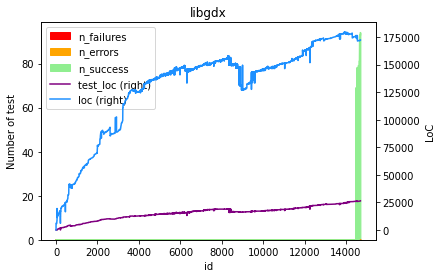

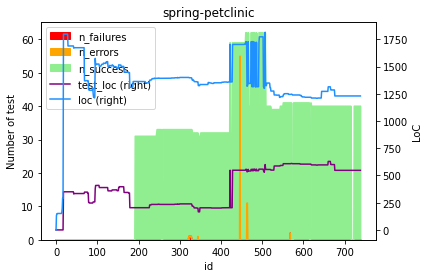

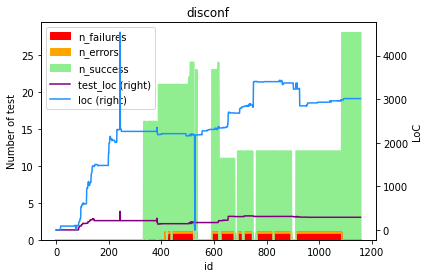

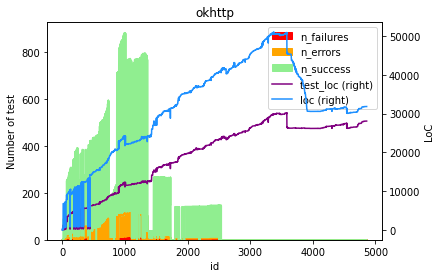

single positional indexer is out-of-bounds


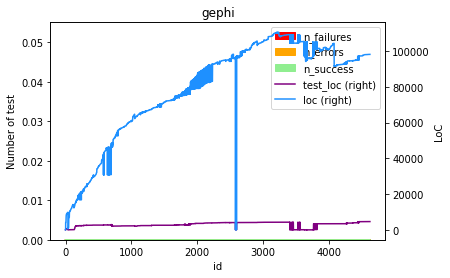

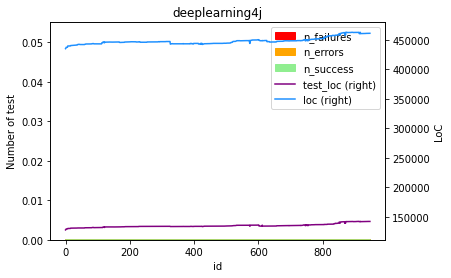

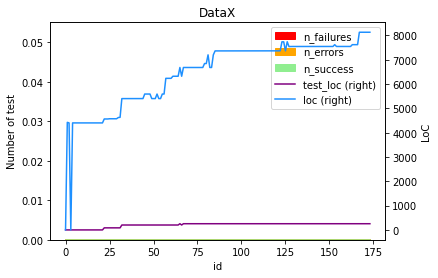

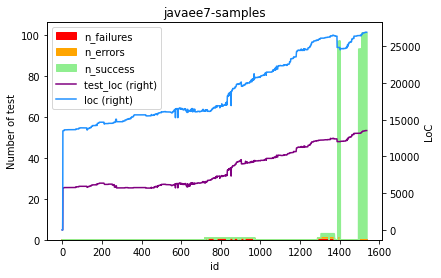

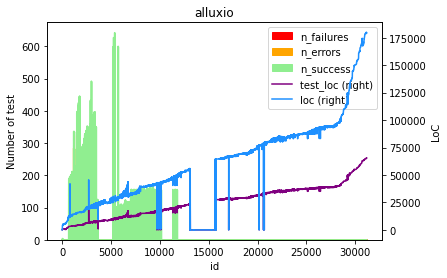

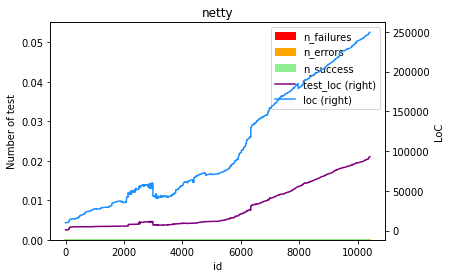

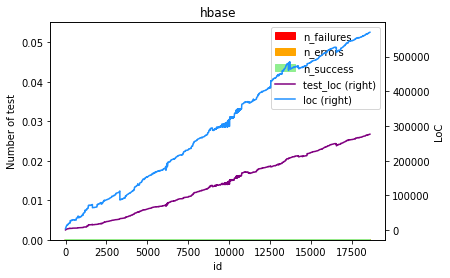

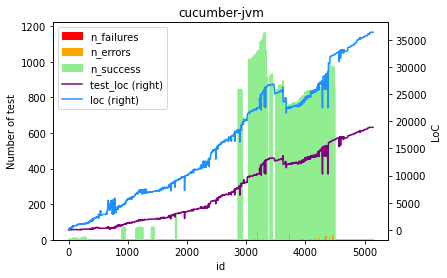

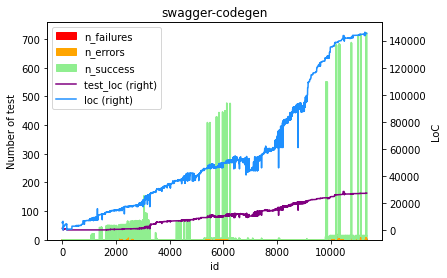

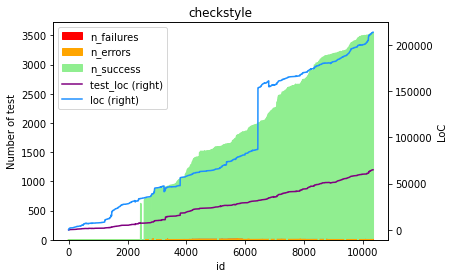

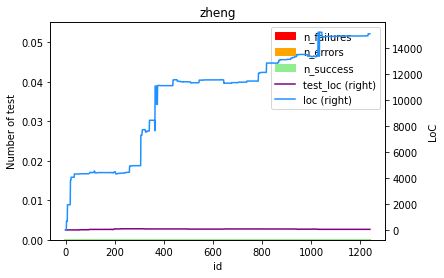

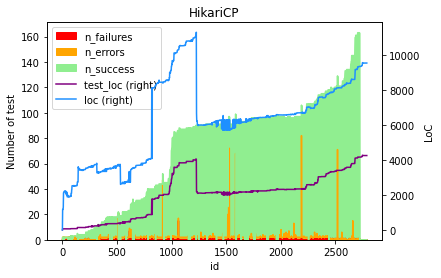

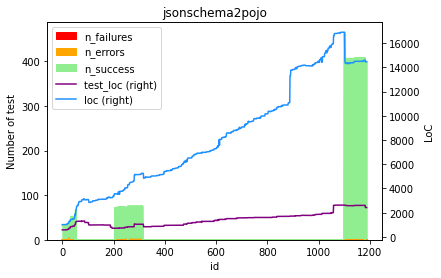

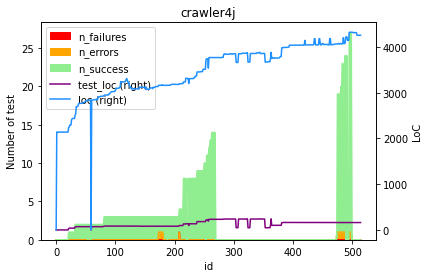

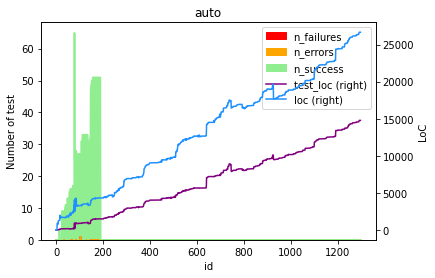

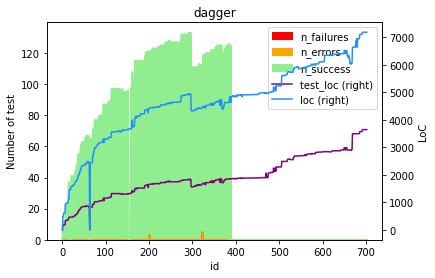

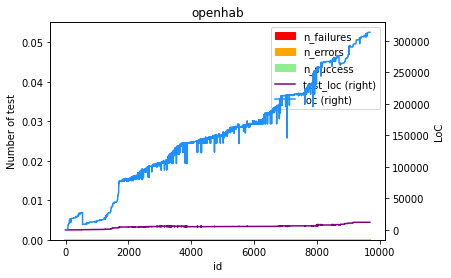

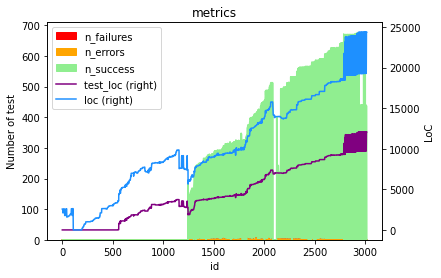

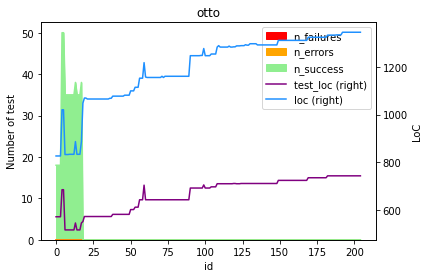

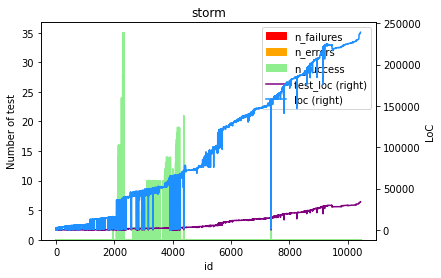

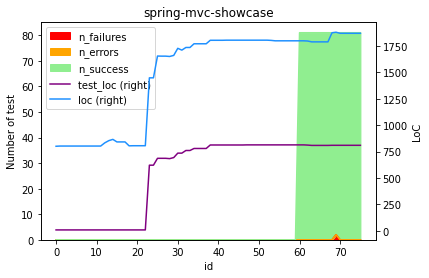

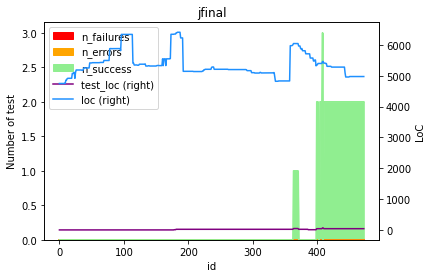

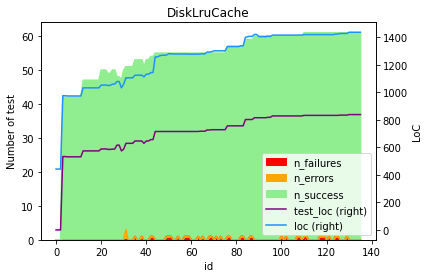

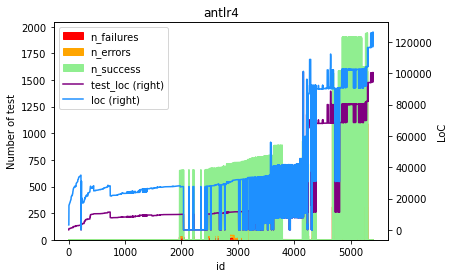

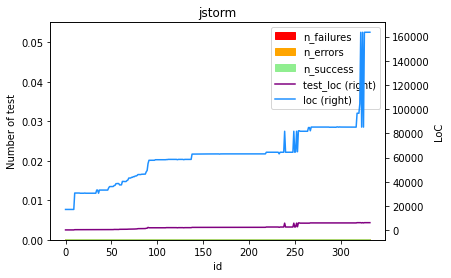

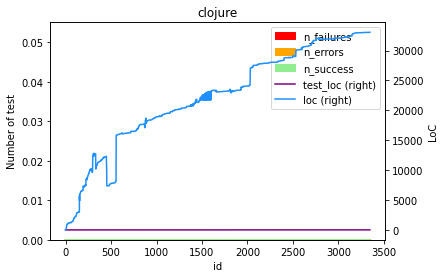

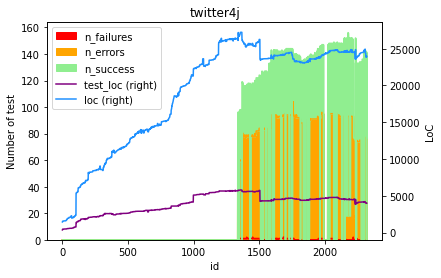

In [6]:
all_projects_src_errors = []
all_projects_test_errors = []

all_errors = []

project_with_errors = []

all_projects = []
projects_with_tests = []
projects_with_runnable_test = []
projects_with_no_runnable_test = []

for dataset, project in all_datasets:
    
    if project not in ignored_android_projects: #and project == "neo4j": 
    
        build_test_errors_path = procesed_results_path+project+"/errors_count.csv"
        
        try:
            pa = ProjectTestAnalysis(project,  2, root=root)
            pa.generateAndSavePlot()
        except Exception as e:
            print(e)
            project_with_errors.append((project, e))

        all_projects.append(pa)
        
        loc_report = pa.getLoCReport()
        
        have_test = loc_report['test_loc'].sum() > 0
        have_runnable_test = pa.summary['n_test'].sum() > 0
        
        if have_test:
            projects_with_tests.append(pa)
            if have_runnable_test:
                projects_with_runnable_test.append(pa)
            else:
                projects_with_no_runnable_test.append(pa)
        else:
            print("Project %s has no test"%project)
                
        if os.path.isfile(build_test_errors_path):

             with open(build_test_errors_path) as csvfile:
                reader = csv.DictReader(csvfile)
                total_errors = 0
                errors = []
                for row in reader:
                    count = int(row['count'])
                    total_errors += count
                    errors.append((row['error'], count))

                for error in errors:
                    all_errors.append([dataset, project, error[0], error[1], (error[1] / total_errors)*100 ])
                
errors_df = pd.DataFrame(all_errors, columns = ['Dataset', 'Project', 'Error', 'Count', "%"])

In [7]:
project_with_errors

[('neo4j', IndexError('single positional indexer is out-of-bounds')),
 ('wildfly', IndexError('single positional indexer is out-of-bounds'))]

In [8]:
print("Analyzed projects: %d"%len(all_projects))
print("Projects with tests: %d"%len(projects_with_tests))
print("Projects with runnable tests: %d"%len(projects_with_runnable_test))

Analyzed projects: 86
Projects with tests: 85
Projects with runnable tests: 66


In [9]:
for p in projects_with_no_runnable_test:
    print(p.project)

guice
Essentials
neo4j
spring-cloud-microservice-example
canal
hive
spring-boot
YCSB
Mycat-Server
wildfly
gephi
deeplearning4j
DataX
netty
hbase
zheng
openhab
jstorm
clojure


- Project Mycat-Server has 0%SourceBuildability due a dependency of git 
- Project Clojure is a programing language and testing is complex
- The remaining projects are multi-module project

In [10]:
errors_df.sort_values(by=['Count'], ascending=False).head(50)

,Dataset,Project,Error,Count,%
1662,ManySStub4J,jedis,java.net.ConnectException: Connection refused ...,343161,47.191822
1669,ManySStub4J,jedis,Failed connecting to host localhost:6379,92039,12.657290
1656,ManySStub4J,jedis,,79072,10.874056
3074,ManySStub4J,twitter4j,,66150,92.438619
1684,ManySStub4J,jedis,Failed to create socket.,64283,8.840258
2763,ManySStub4J,antlr4,,53747,24.136971
2775,ManySStub4J,antlr4,Could not locate python2.7,52408,23.535646
2195,ManySStub4J,okhttp,Could not initialize class sun.security.ssl.SS...,51442,60.171712
2778,ManySStub4J,antlr4,Could not locate g++,51418,23.091052
2776,ManySStub4J,antlr4,Could not locate python3.5,51152,22.971595
